# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis. I'm interested in video games, mobility, culture, and the content industry. I hope to become a data scientist with anomaly detection and anti-cheating. And I hope that my analysis will have a positive impact on the world at least a little bit.  
This is my first Kaggle-data analyzing project on my own. I played with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.  
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  

_ps. English may seem a little awkward, I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


## Importin Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np

import time as time
import matplotlib.pyplot as plt
import seaborn as sns

# import tensorflow as tf
# import keras

np.random.seed(0)
# tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
# print(tf.__version__)
# print(keras.__version__)

import sys
print(sys.version)

data = pd.read_csv("poe_stats.csv")

0.11.2
1.4.1
1.22.4
3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# Q5. Dependency between level and class
---
##### Show dependency between level and class of died characters. Only for HC divisions.
I thought deeply about the question. *Does 'Show dependency ~' this phrase already suppose that the level and class have a dependency on each other before analyzing so far?*  
So I tried to judge by some statistical methods whether they have a dependency. Then I explained(showed) it using logic about the game and stat results.  

If I were a game data analyst, after a little more deeply thinking about this question, I would understand this question as the relation between the dead characters' class and the level.  
And I assumed that the intention of it is searching for some reason why the dead characters are dead. One of the ideas that came up as a search might have been a level or class issue. Maybe it was digging into only Hardcore modes to solve a problem in limited data. Because this data is limiting for analyzing the in-game situations(like losing HP or environment) or boundless combinations of skill/equipment.  

Someone can think that the death is related to just level(user's ability), maybe the class is the problem or both. However, I think this is something to be careful about in the process of asking questions before understanding the analysis properly. It can be a meaningless analysis that gets biased answers or rechecks the predicted results. Death is just 'the death' and it could be related to just one of them or neither, we have to be beware when analyzing a problem kind of this.  
For example, even if there's a relation between them, it is possible that the relationship is caused by the difficulty of piloting the class, regardless of the class's performance(It might be the problem between 'class' and 'level' which is discovered in every 'ladder'.).  

In other words, the analysis of this question is not the end. It can be an insufficient question to make a decision and I think it is a step in the analysis process of big flows. The interpretation of this question and analysis I think is as follows.  

- If there is a correlation between level and class in dead characters, we can start to look for something that could reveal the end(death) of the characters by analyzing relativeness with level or class.  
- On the other hand, if there's no or low dependency between level and class, we can only know that the preference by level about the classes in HC mode(especially for dead characters) doesn't exist.  

Before checking the dependency, I looked at some of the levels and classes statistically for the dead characters.  


---
The methods which can get the dependency,  
1. getting a correlation between level and class.  
2. comparing the average level by each class and one-way ANOVA  

And I imagined also this: make a machine learning model with class and level, and watch whether the model can predict the class just with level! I'm a little bit sorry for the computer but the computer can't do that.

### ratio of dead characters
We looked at the hardcore mode of the percentage of dead characters.  
It seems that the proportion of characters who haven't finished the battle yet is not small.

In [6]:
# dataframe contains only hardcore modes
df_hc = df.loc[df['ladder'].isin(['SSF Harbinger HC', 'Hardcore Harbinger'])]

# dead characters data frame with the level data
df_dead = df_hc.loc[df['dead'] == True][['class', 'level']]

# dead characters rate
df_hc.pivot_table(index = 'ladder', values = 'dead')

,dead
ladder,
Hardcore Harbinger,0.63
SSF Harbinger HC,0.74


### dead characters’ level distribution in Hardcore mode
We looked at the level distribution of dead characters. 80 is the average, and the median is about 88.  
As a result of checking with the graph, it is distributed a lot in the high level section.  

If you think this game mode itself is a "challenging place, a place to test limits," it is no wonder that most characters have high levels. In particular, it is not because of the high level, but because there are many characters who are challenging themselves who are at a high level.

In [7]:
df_dead['level'].describe()

count   20,581.00
mean        80.23
std         13.03
min         53.00
25%         69.00
50%         88.00
75%         91.00
max        100.00
Name: level, dtype: float64

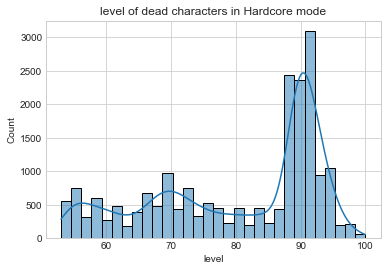

In [8]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 4)
plt.style.use("seaborn-whitegrid")

sns.histplot(x = df_dead['level'], palette = 'Paired', kde = True)
plt.title("level of dead characters in Hardcore mode")
plt.show()

### Average level of dead characters by class
I visualized the average level of dead characters by class.

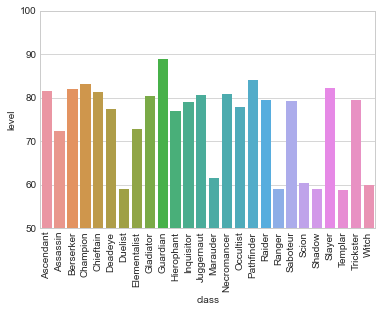

In [9]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.xticks(rotation = 90)
plt.ylim(50, 100)
df_hc_lev_mean = df_dead.groupby('class')[['level']].mean()
sns.barplot(data = df_hc_lev_mean, x = df_hc_lev_mean.index, y = 'level')
plt.show()

### **About the average graph, and the important point: Ascendancy Classes and Pre-Ascendancy Classes**

##### What we know from the graph: **The average level of Duelist, Marauder, Ranger, Scion, Templar and Witch is markedly small.**  
As you know, 'Duelist', 'Marauder', 'Ranger', 'Scion', 'Templar', and 'Witch' are *root classes(I named)* of 19 *ascendancy classes*.  
To add to the explanation, it probably has differences between all of these classes. Perhaps if we do ANOVA with all of these classes, it will be different, and if we do all the post-hoc comparison results, we will see a difference in these classes(especially with root classes).  

In other words, some classes' level is indeed lower, strictly speaking, but we don't think that means exactly the level correlates with the class.  
Because it seems Hardcore modes had a constraint on the level to enter the mode, and the minimum level for who could play Hardcore modes is inferred 53.  

<br>
 As [Path Of Exile Official documents](https://www.pathofexile.com/ascendancy/classes), *" Upon completing the Lord's Labyrinth for the first time, you can pick an Ascendancy class from one of the three available for your class. The first time you complete the Labyrinth on each difficulty, you will receive two Ascendancy Points for its skill tree."*.

I tried setting the skill trees for this part on the official homepage, and I found it has high degrees of freedom. In other words, most of them are playing games in a changed class(Ascendancy class) to meet the utility(or performance) they want. 

<br>
Of the approximately 30,000 rank data, it makes sense that the 293 root class characters in this ranking list have a lower average. They just didn't finish the Labyrinth. Their level will be higher than this when they finish the Labyrinth and be the ascendancy classes. Of course, they are indeed excellent at playing POE because they’re ranked with other ascendancy classes. 

<br>
But we must keep in view whether their level(lev.53) and the class is "by their will or not".  
The probability of a case that some aces(People with higher skills than the level indicated by numbers) play the game with root classes for fun or desire. And it would be that some aces can play the game without applying the "Ascendency Point" they get after completing the maze to play at a difficult level.  

_From the perspective of gamers, if we think a little more, we could notice that the case would be there considerably much that already experienced users want to get a high rank with a fresh character for some reason.
(And when their class is matched with popular classes in the version(patch) of the game... The possibility that a scenario would be right is high.-for example, specific classes are over-power in the mode-)_

---

We have to prove the fact so I did an ANOVA test. \ (^0^\ ) =33

### analysis process plan:
1. correlation
    1. regardless of *root classes*
    2. without *root classes*
2. ANOVA test
    1. regardless of *root classes*
    2. without *root classes*
3. (additional analysis) grouping all by *root classes* to 7 clusters.
    1. correlation
    2. ANOVA

In my opinion, the ANOVA test is quite strict, so the result composited by all classes is a little ambiguous when we care about Ascendancy classes and root classes.  
So, I looked at the mean and standard deviation of *root classes* and *ascendancy classes* first.  

And I'll proceed following the process plan.

In [10]:
# we can see the difference between 'Root classes' and 'Ascendancy classes'

# 'root classes'
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']

# division01: not 'Ascending Classes' ('root classes')
print(df_dead.loc[df_dead['class'].isin(rootclasses)].describe())

# division02: 'Ascending Classes'
print(df_dead.loc[~df_dead['class'].isin(rootclasses)].describe())

       level
count 321.00
mean   59.79
std     6.44
min    53.00
25%    55.00
50%    58.00
75%    63.00
max    89.00
          level
count 20,260.00
mean      80.55
std       12.85
min       53.00
25%       70.00
50%       89.00
75%       91.00
max      100.00


## 5-1. correlation from one-hot encoding data and a heatmap

It's an ~~extreme~~ measure when want to see the correlation.

I wanna see the results together if there're relations between some classes.

---
### 5-1-1. correlation (all classes)
Get correlation matrix and heatmap with dummied classes columns.

#### get dummies and correlation

In [11]:
df_deads_allonehot = pd.get_dummies(df_dead, drop_first = False)
df_deads_allonehot.head(5)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,class_Gladiator,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
15,100,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
24,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_deads_allonehot.corr().round(3)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Duelist,class_Elementalist,class_Gladiator,...,class_Pathfinder,class_Raider,class_Ranger,class_Saboteur,class_Scion,class_Shadow,class_Slayer,class_Templar,class_Trickster,class_Witch
level,1.00,0.03,-0.06,0.05,0.04,0.02,-0.02,-0.08,-0.09,0.01,...,0.04,-0.01,-0.05,-0.01,-0.06,-0.06,0.04,-0.08,-0.02,-0.10
class_Ascendant,0.03,1.00,-0.03,-0.10,-0.04,-0.06,-0.03,-0.01,-0.04,-0.09,...,-0.04,-0.07,-0.01,-0.04,-0.01,-0.01,-0.08,-0.01,-0.07,-0.02
class_Assassin,-0.06,-0.03,1.00,-0.04,-0.02,-0.02,-0.01,-0.01,-0.02,-0.04,...,-0.01,-0.03,-0.00,-0.02,-0.00,-0.00,-0.03,-0.01,-0.03,-0.01
class_Berserker,0.05,-0.10,-0.04,1.00,-0.06,-0.08,-0.04,-0.02,-0.06,-0.13,...,-0.05,-0.10,-0.01,-0.06,-0.01,-0.01,-0.12,-0.02,-0.10,-0.02
class_Champion,0.04,-0.04,-0.02,-0.06,1.00,-0.03,-0.02,-0.01,-0.02,-0.05,...,-0.02,-0.04,-0.01,-0.03,-0.01,-0.01,-0.05,-0.01,-0.04,-0.01
class_Chieftain,0.02,-0.06,-0.02,-0.08,-0.03,1.00,-0.03,-0.01,-0.03,-0.07,...,-0.03,-0.05,-0.01,-0.03,-0.01,-0.01,-0.07,-0.01,-0.06,-0.01
class_Deadeye,-0.02,-0.03,-0.01,-0.04,-0.02,-0.03,1.00,-0.01,-0.02,-0.04,...,-0.02,-0.03,-0.00,-0.02,-0.01,-0.00,-0.04,-0.01,-0.03,-0.01
class_Duelist,-0.08,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,1.00,-0.01,-0.02,...,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,-0.01,-0.00
class_Elementalist,-0.09,-0.04,-0.02,-0.06,-0.02,-0.03,-0.02,-0.01,1.00,-0.05,...,-0.02,-0.04,-0.01,-0.02,-0.01,-0.01,-0.05,-0.01,-0.04,-0.01
class_Gladiator,0.01,-0.09,-0.04,-0.13,-0.05,-0.07,-0.04,-0.02,-0.05,1.00,...,-0.05,-0.08,-0.01,-0.05,-0.01,-0.01,-0.10,-0.02,-0.09,-0.02


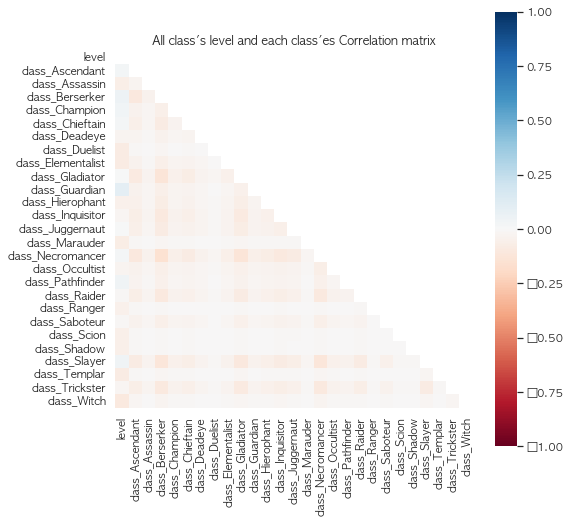

In [139]:
mask = np.zeros_like(df_deads_allonehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8, 8))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_deads_allonehot.corr().shape[1]):
    for j in range(df_deads_allonehot.corr().shape[0]):
        if (abs(df_deads_allonehot.corr().iat[i, j]) > 0.2) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_deads_allonehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('All class\'s level and each class\'es Correlation matrix')
plt.show()

---
### 5-1-2. correlation (without _root classes_)

In [14]:
df_deads_aconehot = pd.get_dummies(df_dead.loc[~df_dead['class'].isin(rootclasses)], drop_first = False)
df_deads_aconehot.head(5)

,level,class_Ascendant,class_Assassin,class_Berserker,class_Champion,class_Chieftain,class_Deadeye,class_Elementalist,class_Gladiator,class_Guardian,class_Hierophant,class_Inquisitor,class_Juggernaut,class_Necromancer,class_Occultist,class_Pathfinder,class_Raider,class_Saboteur,class_Slayer,class_Trickster
15,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
24,100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
32,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48,100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
77,99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


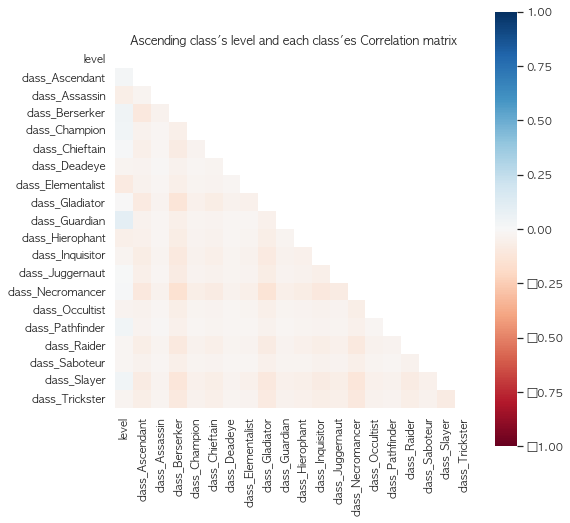

In [140]:
mask = np.zeros_like(df_deads_aconehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8, 8))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_deads_aconehot.corr().shape[1]):
    for j in range(df_deads_aconehot.corr().shape[0]):
        if (abs(df_deads_aconehot.corr().iat[i, j]) > 0.2) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_deads_aconehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('Ascending class\'s level and each class\'es Correlation matrix')
plt.show()

### result1:
I marked with 'O' which values' absolute value is over 0.2, but there's not a mark anywhere.  

After getting dummies, the data indeed became scarce data.  
And this method can't draw a markable correlation between the level and the class even if they have.

## 5-2. ANOVA test
---
### 5-2-1. ANOVA test (all classes)

#### 5-2-1-1.  Average level

In [16]:
pd.options.display.float_format = '{:,.4f}'.format
df_dead.groupby('class')[['level']].describe()

level                                                  \
                  count    mean     std     min     25%     50%     75%   
class                                                                     
Ascendant    1,380.0000 81.5486 12.8000 53.0000 71.0000 89.0000 91.0000   
Assassin       225.0000 72.4044 13.3838 53.0000 59.0000 71.0000 88.0000   
Berserker    2,621.0000 81.9103 12.1472 53.0000 72.0000 89.0000 91.0000   
Champion       509.0000 83.2161 11.3075 53.0000 75.0000 89.0000 91.0000   
Chieftain      913.0000 81.3450 12.1997 53.0000 70.0000 89.0000 91.0000   
Deadeye        269.0000 77.4721 14.6635 53.0000 62.0000 83.0000 90.0000   
Duelist         49.0000 58.9796  5.2737 53.0000 55.0000 57.0000 62.0000   
Elementalist   442.0000 72.7805 13.3096 53.0000 60.0000 71.0000 89.0000   
Gladiator    2,097.0000 80.4425 12.7801 53.0000 70.0000 87.0000 91.0000   
Guardian       448.0000 88.8504  9.6724 53.0000 90.0000 91.0000 94.0000   
Hierophant     755.0000 76.8940 12.5021 53.0000 67.0000 76.0000 89.0000   
Inquisitor   1,306.0000 79.0972 12.9534 53.0000 68.0000 84.0000 90.0000   
Juggernaut     881.0000 80.6390 12.2881 53.0000 70.0000 86.0000 91.0000   
Marauder        60.0000 61.5500  7.4160 53.0000 55.0000 60.0000 66.5000   
Necromancer  2,712.0000 80.9071 12.7378 53.0000 70.0000 88.5000 91.0000   
Occultist      523.0000 77.7992 13.6312 53.0000 67.0000 79.0000 90.5000   
Pathfinder     373.0000 84.0214 12.9062 53.0000 76.0000 90.0000 92.0000   
Raider       1,216.0000 79.5378 13.7679 53.0000 68.0000 89.0000 91.0000   
Ranger          22.0000 58.9091  5.0418 53.0000 55.2500 57.5000 60.7500   
Saboteur       483.0000 79.1097 13.2935 53.0000 68.0000 84.0000 91.0000   
Scion           32.0000 60.3438  7.8190 53.0000 55.7500 58.0000 62.2500   
Shadow          28.0000 59.0357  4.9776 53.0000 55.0000 57.5000 62.0000   
Slayer       1,825.0000 82.1096 11.9417 53.0000 72.0000 89.0000 91.0000   
Templar         52.0000 58.7308  4.9670 53.0000 54.0000 58.0000 61.2500   
Trickster    1,282.0000 79.3549 12.8341 53.0000 69.0000 84.0000 90.0000   
Witch           78.0000 59.9231  7.2323 53.0000 54.0000 58.0000 63.7500   

                       
                  max  
class                  
Ascendant    100.0000  
Assassin      94.0000  
Berserker    100.0000  
Champion      99.0000  
Chieftain     99.0000  
Deadeye       98.0000  
Duelist       71.0000  
Elementalist 100.0000  
Gladiator    100.0000  
Guardian     100.0000  
Hierophant    98.0000  
Inquisitor   100.0000  
Juggernaut    99.0000  
Marauder      83.0000  
Necromancer  100.0000  
Occultist    100.0000  
Pathfinder    98.0000  
Raider       100.0000  
Ranger        70.0000  
Saboteur     100.0000  
Scion         89.0000  
Shadow        73.0000  
Slayer       100.0000  
Templar       71.0000  
Trickster    100.0000  
Witch         88.0000

#### 5-2-1-2. Boxplot by class
Get a boxplot and compare their average. 

In [17]:
# data division : make a each classes array for repeatation
df_dead.sort_values(['class'], inplace = True)
list_class = df_dead['class'].unique()

# list_level = []
for c in list_class:
    condition = (df_dead['class'] == c)
    df_bin = df_dead.loc[condition]
    globals()["ar_{}".format(c)] = np.array(df_bin['level'])
#     list_level.append(globals()["ar_{}".format(c)])

# make a variate list: Actually, this can't function...
# so we make a list composed of the above variable based on this list
list_level = []
for c in list_class:
    d = 'ar_' + c
    list_level.append(d)

In [18]:
# Included classes are : 
list_level = [ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch]

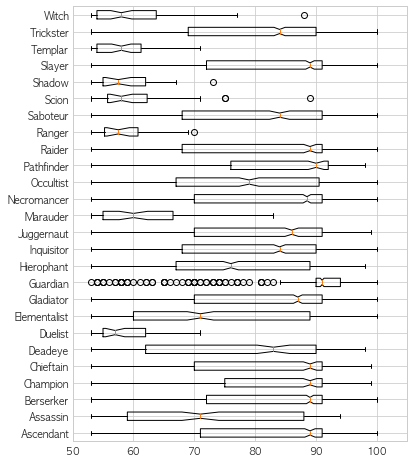

In [19]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 8)
plt.boxplot([ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, 
             ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, 
             ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, 
             ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, 
             ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, 
             ar_Witch], notch = True, vert=False)
plt.xlim(50, 105)
plt.yticks(range(1, len(list_level)+1), list_class)
plt.show()

#### Average and Boxplot result:

- There are fewer than 100 Root classes characters in the rankings. It is noticeable that their highest level is less than 90 degrees. Really, their average level is only over 60 or less.  
Nevertheless, they were comparable to the higher level of Ascendancy classes where you could use more detailed, higher utilized skills.  

- One box's $Q_1$ is bigger than the other's $Q_3$, it has a difference between them without further discussion.  
And it really does, some classes whose average level is lower than others are smaller than others $Q_3$.

#### 5-2-1-3. ANOVA

#### (1) Normality and skewness test: Shapiro-wilk test 

Some class has samples under 30(Ranger, Shadow), so I choose the Shapiro-wilk test.

In [20]:
from scipy.stats import *
for cl, array in zip(list_class, list_level):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array))
    print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")
    if abs(stats.skew(array, bias = False)) > 2:
        print("> Skewness is over")
    print('\n')

# == Ascendant Shapiro-wilk test ==
ShapiroResult(statistic=0.8464069366455078, pvalue=1.406005808364913e-34)
Skewness: 0.7893670910990486


# == Assassin Shapiro-wilk test ==
ShapiroResult(statistic=0.9036740064620972, pvalue=7.442096938703457e-11)
Skewness: 0.12445145034207133


# == Berserker Shapiro-wilk test ==
ShapiroResult(statistic=0.8378379344940186, pvalue=1.401298464324817e-45)
Skewness: 0.9156226298067661


# == Champion Shapiro-wilk test ==
ShapiroResult(statistic=0.8304262161254883, pvalue=7.788036228770405e-23)
Skewness: 1.09535600328427


# == Chieftain Shapiro-wilk test ==
ShapiroResult(statistic=0.8603966236114502, pvalue=1.0740052335092418e-27)
Skewness: 0.7549078959756601


# == Deadeye Shapiro-wilk test ==
ShapiroResult(statistic=0.8607589602470398, pvalue=7.343571517754496e-15)
Skewness: 0.3566468145186242


# == Duelist Shapiro-wilk test ==
ShapiroResult(statistic=0.8795055150985718, pvalue=0.0001255940442206338)
Skewness: 0.8906833141117315


# == Elementalist S

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3998002070.py:5: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3998002070.py:8: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  if abs(stats.skew(array, bias = False)) > 2:


#### Normality test results:
There was no class satisfying normality. But many classes have enough samples to assume the central limit theorem, so I kept going with the equal-variance test. 

- Plus: Only `Scion` and `Guardian` 's skewness is over 2.


#### (2) Equal-Variance test

I tested by two test methods, Levene and Fligner-Killeen.  
- Bartlett test which is a popular method must be normality in data, 
- Levene test is less sensitive to normality.   
- and Fligner-Killeen test, it is said that some nonparametric tests do not correlate with the size or probability distribution of the sample.  

In [21]:
levene(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

LeveneResult(statistic=18.631784427117147, pvalue=9.597742330362986e-82)

In [22]:
fligner(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

FlignerResult(statistic=535.175634847063, pvalue=3.8612549948345704e-97)

#### Equal-Variance test results

All class's data satisfied equal variances.

#### (3) One-way ANOVA 


In [23]:
f_oneway(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

F_onewayResult(statistic=63.98606057045286, pvalue=2.38182378124225e-310)

#### One-way ANOVA results:
The p-value is under 0.05 and it could be said that there're differences between all class levels.  

And the level data didn't satisfy normality, so I added the non-parametric test, the Kruskal-Wallis H test.  

#### (4) Kruskal-Wallis H test

In [24]:
kruskal(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Duelist, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Marauder, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Ranger, ar_Saboteur, ar_Scion, ar_Shadow, ar_Slayer, ar_Templar, ar_Trickster, ar_Witch)

KruskalResult(statistic=1376.5361867441661, pvalue=3.928809290642803e-275)

#### Kruskal_Wallis H test results:

The p-value is also under 0.05 in this method and it could be said that there're differences between all class levels.  

(We already know, but) Let's uncover what classes are different from other classes.  

#### (5) Post-hoc 1 : Bonferroni

The number of samples is different in each class, so I choose Bonferroni's test and Scheffe's test.  

This is because it can be used in both parametric and non-parametric methods, and can be used even if the number of samples is different.  

However, the more comparison groups, the weaker the power in Bonferroni's, so a strict method of the Scheffe test will also be added next.

In [25]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_dead['level'], df_dead['class'])
tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')
type(tb1)

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/4034465408.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tb1, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')


statsmodels.iolib.table.SimpleTable

_This tb1 is too long to show in this, so I wanted to show reject 'TRUE' rows but I couldn't find simple solutions.  
So I saved these results and reloaded them on this notebook. Check this._

In [26]:
# save the `statsmodels.iolib.table.SimpleTable` type result(tb1) to csv
with open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb1.csv','w') as fh:
    fh.write(tb1.as_csv())

# call the info of the results, 3 lines.
fh2 = open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb1.csv', 'r')
for i in range(3):
    line = fh2.readline()
    print(line)
    pass
fh2.close()

# load the data from csv file, except the result info lines.
# the columns have 'space' because of the table form previous itself
df_bonftmp = pd.read_csv("tb1.csv", header = 3)
df_bonftmp.columns = columns = ['group1', 'group2', 'stat', 'pval', 'pval_corr', 'reject']

# reject column data is object type including 'space'.
# array(['True  ', 'False '], dtype=object)
# correct the data to 1 or 0
df_bonftmp.loc[df_bonftmp['reject']=='True  ', 'reject'] = 1
df_bonftmp.loc[df_bonftmp['reject']=='False ', 'reject'] = 0

# and group1 and group2 columns have Mysterious 'Space' Format too, so edit it.
df_bonftmp['group1'] = df_bonftmp['group1'].str.replace(" ", "")
df_bonftmp['group2'] = df_bonftmp['group2'].str.replace(" ", "")

Test Multiple Comparison ttest_ind 

FWER=0.05 method=bonf

alphacSidak=0.00, alphacBonf=0.000



The reason why we look at less than the ones that are completely proven to be meaningful is to see which classes are different besides the classes that are clearly different, as we've already seen in the box plot.  

In [27]:
# check the reject 'True' and descending order by the p-value
# (p-value < 0.05, the average difference has meaning.)

# head(10)
df_bonftmp.loc[df_bonftmp['reject']==1].sort_values('pval', ascending = False).head(10)

,group1,group2,stat,pval,pval_corr,reject
236,Juggernaut,Occultist,4.0177,0.0001,0.0201,1
16,Ascendant,Raider,3.8547,0.0001,0.0386,1
54,Berserker,Gladiator,4.0296,0.0001,0.0184,1
28,Assassin,Deadeye,-3.9796,0.0001,0.0258,1
82,Champion,Necromancer,3.8171,0.0001,0.0447,1
80,Champion,Juggernaut,3.8772,0.0001,0.0360,1
202,Guardian,Templar,22.1053,0.0000,0.0000,1
203,Guardian,Trickster,14.3036,0.0000,0.0000,1
204,Guardian,Witch,25.2066,0.0000,0.0000,1
206,Hierophant,Juggernaut,-6.0960,0.0000,0.0000,1


In [28]:
# check the reject 'True' and descending order by the p-value correlation
# (p-value < 0.05, the average difference has meaning.)

# head(20)
df_bonftmp.loc[df_bonftmp['reject']==1].sort_values('pval_corr', ascending = False).head(20)

,group1,group2,stat,pval,pval_corr,reject
82,Champion,Necromancer,3.8171,0.0001,0.0447,1
16,Ascendant,Raider,3.8547,0.0001,0.0386,1
80,Champion,Juggernaut,3.8772,0.0001,0.0360,1
28,Assassin,Deadeye,-3.9796,0.0001,0.0258,1
236,Juggernaut,Occultist,4.0177,0.0001,0.0201,1
54,Berserker,Gladiator,4.0296,0.0001,0.0184,1
100,Chieftain,Inquisitor,4.1194,0.0000,0.0128,1
123,Deadeye,Necromancer,-4.1582,0.0000,0.0107,1
178,Gladiator,Occultist,4.1748,0.0000,0.0100,1
222,Inquisitor,Necromancer,-4.1953,0.0000,0.0090,1


As we saw the boxplot:`5-2-1-2. Boxplot by class`, most _root classes_ distribution are different with _ascending classes_ .  
'reject' ratio can divided by _root classes_ and _ascending classes_ to compare them.  

Even among classes that show significant differences in p-value, pval_corr shows that pairs with some tendency are the same Ascendancy classes. On the contrary, it seems that classes that showed a clear difference in the box plot will appear.

In [29]:
# check the reject 'True' and ascending order by the p-value 
# (p-value < 0.05, the average difference has meaning.)

# head(20)
df_bonftmp.loc[df_bonftmp['reject']==1].sort_values('pval', ascending = True).head(20)

,group1,group2,stat,pval,pval_corr,reject
0,Ascendant,Assassin,9.8722,0.0000,0.0000,1
198,Guardian,Saboteur,12.7011,0.0000,0.0000,1
199,Guardian,Scion,16.2908,0.0000,0.0000,1
200,Guardian,Shadow,16.1660,0.0000,0.0000,1
201,Guardian,Slayer,11.0877,0.0000,0.0000,1
202,Guardian,Templar,22.1053,0.0000,0.0000,1
203,Guardian,Trickster,14.3036,0.0000,0.0000,1
204,Guardian,Witch,25.2066,0.0000,0.0000,1
206,Hierophant,Juggernaut,-6.0960,0.0000,0.0000,1
207,Hierophant,Marauder,9.3732,0.0000,0.0000,1


I compared each reject percentage of Ascendancy classes and Root classes.

In [30]:
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']
root_ratio = df_bonftmp.loc[(df_bonftmp['group1'].isin(rootclasses))|
                            (df_bonftmp['group2'].isin(rootclasses))]
root_ratio['reject'].mean()

0.8636363636363636

In [31]:
asce_ratio = df_bonftmp.loc[~((df_bonftmp['group1'].isin(rootclasses))|
                            (df_bonftmp['group2'].isin(rootclasses)))]
asce_ratio['reject'].mean()

0.6198830409356725

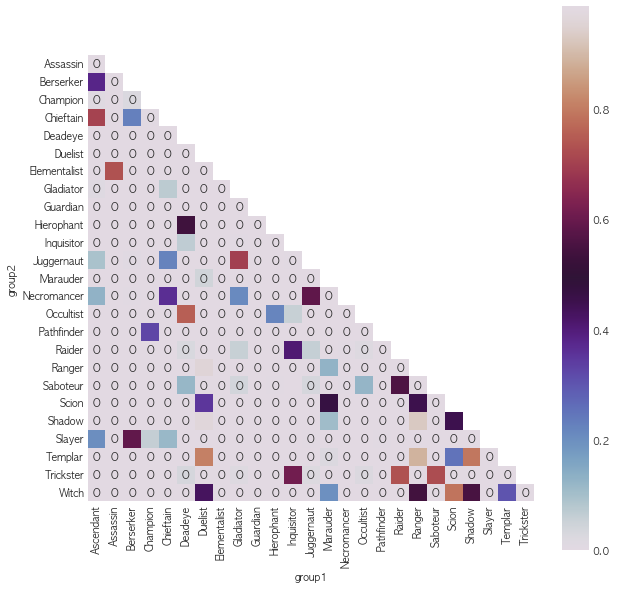

In [32]:
# Bonferroni's test visualiazation
df_bonfheat = df_bonftmp.pivot_table(values = 'pval', 
                                     index = 'group1', columns = 'group2').T
# # It doesn't need to mask (np.nan are already there)
# mask = np.zeros_like(df_sche)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_bonfheat.shape[1]):
    for j in range(df_bonfheat.shape[0]):
        if (df_bonfheat.iat[j, i] < 0.05):
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_bonfheat, cmap = 'twilight', square = True)
plt.show()

#### Bonferroni test results:
- The `reject` result is difficult to explain easily because it is too large to compare the two of their samples(Ascendancy class and Root class).  
  

- And I compared the reject ratio between when the class is 'root classes' and 'ascendancy classes'. (Among the two ratios, if one has a different markedly, thinking by dividing 'root class' and 'ascendancy class' is valid.)  
    The gap between the two reject ratios isn't little.  
    This clearly shows that it can be useful to think of _root class_ and _ascending class_ separately.  
    
#### (6) Post-hoc 2 : Scheffe 

In [33]:
import scikit_posthocs as sp
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{: .4f}'.format)
df_sche = sp.posthoc_scheffe(df_dead, val_col = 'level', group_col = 'class')
df_sche

,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Marauder,Necromancer,Occultist,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
Ascendant,1.0000,0.0000,1.0000,0.9999,1.0000,0.5355,0.0000,0.0000,0.9999,0.0000,0.0000,0.4310,1.0000,0.0000,1.0000,0.1122,0.9908,0.8966,0.0000,0.9698,0.0000,0.0000,1.0000,0.0000,0.7319,0.0000
Assassin,0.0000,1.0000,0.0000,0.0000,0.0000,0.7492,0.0065,1.0000,0.0000,0.0000,0.6266,0.0006,0.0000,0.0815,0.0000,0.2626,0.0000,0.0001,0.5691,0.0116,0.4161,0.2979,0.0000,0.0021,0.0002,0.0003
Berserker,1.0000,0.0000,1.0000,1.0000,1.0000,0.2072,0.0000,0.0000,0.9172,0.0000,0.0000,0.0116,0.9999,0.0000,0.9991,0.0053,0.9983,0.2379,0.0000,0.7316,0.0000,0.0000,1.0000,0.0000,0.0772,0.0000
Champion,0.9999,0.0000,1.0000,1.0000,0.9998,0.0602,0.0000,0.0000,0.7477,0.0038,0.0000,0.0337,0.9684,0.0000,0.9524,0.0038,1.0000,0.1964,0.0000,0.3814,0.0000,0.0000,1.0000,0.0000,0.0989,0.0000
Chieftain,1.0000,0.0000,1.0000,0.9998,1.0000,0.7590,0.0000,0.0000,1.0000,0.0000,0.0012,0.8737,1.0000,0.0000,1.0000,0.3808,0.9863,0.9939,0.0000,0.9966,0.0000,0.0000,1.0000,0.0000,0.9713,0.0000
Deadeye,0.5355,0.7492,0.2072,0.0602,0.7590,1.0000,0.0000,0.5576,0.9720,0.0000,1.0000,1.0000,0.9751,0.0000,0.8288,1.0000,0.0159,1.0000,0.0097,1.0000,0.0009,0.0006,0.1590,0.0000,1.0000,0.0000
Duelist,0.0000,0.0065,0.0000,0.0000,0.0000,0.0000,1.0000,0.0008,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Elementalist,0.0000,1.0000,0.0000,0.0000,0.0000,0.5576,0.0008,1.0000,0.0000,0.0000,0.2277,0.0000,0.0000,0.0170,0.0000,0.0437,0.0000,0.0000,0.4308,0.0002,0.2530,0.1717,0.0000,0.0002,0.0000,0.0000
Gladiator,0.9999,0.0000,0.9172,0.7477,1.0000,0.9720,0.0000,0.0000,1.0000,0.0000,0.0100,0.9982,1.0000,0.0000,1.0000,0.8182,0.4226,1.0000,0.0000,1.0000,0.0000,0.0000,0.8744,0.0000,1.0000,0.0000
Guardian,0.0000,0.0000,0.0000,0.0038,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2208,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


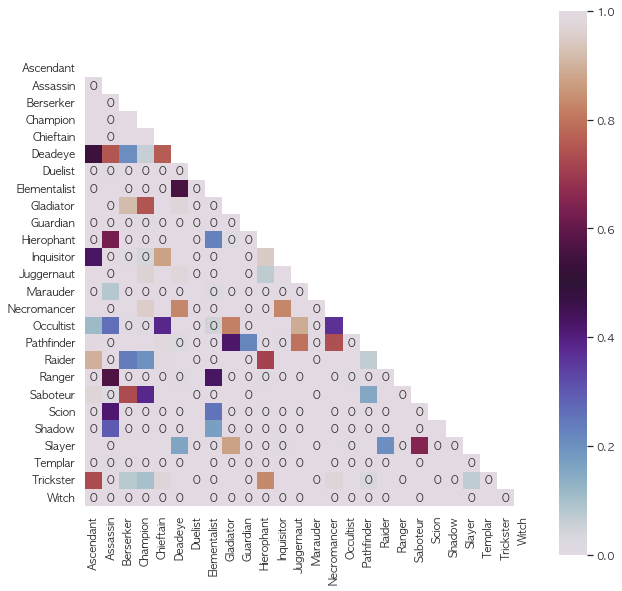

In [141]:
# Scheffe's test:
mask = np.zeros_like(df_sche)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_sche.shape[1]):
    for j in range(df_sche.shape[0]):
        if (df_sche.iat[i, j] < 0.05) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_sche, mask = mask, cmap = 'twilight', square = True)
plt.show()

There are still many "O"s, and while I was worried that it would just give more strict results, I think I got reliable results at the game system level.  
In the case of Witch, the bottom row, you can see that the difference between the same Root class as Duelist or Scion, Ranger, Marauder, Shadow, and Templar is not significant. The same goes for Marauder.  
In addition, Guardian, which was said to be different from all classes in this Bonferroni test, showed that there was no difference from Pathfinder, which is the same Ascendency class.  

Seperate them and check the values.

In [35]:
# root classes have low p-values with ascending classes.
df_sche[df_sche.columns.isin(rootclasses)]

,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Duelist,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Marauder,Necromancer,Occultist,Pathfinder,Raider,Ranger,Saboteur,Scion,Shadow,Slayer,Templar,Trickster,Witch
Duelist,0.0000,0.0065,0.0000,0.0000,0.0000,0.0000,1.0000,0.0008,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Marauder,0.0000,0.0815,0.0000,0.0000,0.0000,0.0000,1.0000,0.0170,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Ranger,0.0000,0.5691,0.0000,0.0000,0.0000,0.0097,1.0000,0.4308,0.0000,0.0000,0.0113,0.0004,0.0000,1.0000,0.0000,0.0040,0.0000,0.0002,1.0000,0.0006,1.0000,1.0000,0.0000,1.0000,0.0002,1.0000
Scion,0.0000,0.4161,0.0000,0.0000,0.0000,0.0009,1.0000,0.2530,0.0000,0.0000,0.0008,0.0000,0.0000,1.0000,0.0000,0.0002,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Shadow,0.0000,0.2979,0.0000,0.0000,0.0000,0.0006,1.0000,0.1717,0.0000,0.0000,0.0006,0.0000,0.0000,1.0000,0.0000,0.0001,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Templar,0.0000,0.0021,0.0000,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
Witch,0.0000,0.0003,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000


In [36]:
# Whereas, root classes have high p-values with root classes.
df_sche[df_sche.columns.isin(rootclasses)][rootclasses]

,Duelist,Marauder,Ranger,Scion,Shadow,Templar,Witch
Duelist,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Marauder,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Ranger,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Scion,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Shadow,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Templar,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Witch,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Scheffe test results:

I marked the p-values which is less than 0.05, and the classes

- Overall, there seems to be a difference. However, when the root classes were considered separately, there was a difference between them, and the results can be interpreted as having little difference between root classes.
- And plus, as you see, there are more number of marks in the Bonferroni result's heatmap. The Bonferroni method is stricter than Scheffe in this case.

---
### ANOVA test (All classes) results

The difference is mostly valid that includes root classes.
So, one-way ANOVA and Kruskal_Wallis H test give very low p-values but it doesn't mean that the level has a markable relation with classes. Rather, the level has a relation to the class state, like after completing the Lord's Labyrinth or not. 

As long as Root class and the Ascendancy class existed separately in the game system, this result alone could not say that there was a clear difference between classes, in other words, the exists of the level and class's dependency.  


### 5-2-2. ANOVA test (without _root classes_, only ascending classes)
We could see there is a difference between class states(Root or not) certainly.  
So I progressed in analyzing without root classes like the way analysis process above.  

#### 5-2-2-1.  Average level

In [37]:
df_dead_ac = df_dead.loc[~df_dead['class'].isin(rootclasses)]
df_dead_ac.groupby('class')[['level']].describe()

level                                                        \
                  count     mean      std      min      25%      50%      75%   
class                                                                           
Ascendant     1380.0000  81.5486  12.8000  53.0000  71.0000  89.0000  91.0000   
Assassin       225.0000  72.4044  13.3838  53.0000  59.0000  71.0000  88.0000   
Berserker     2621.0000  81.9103  12.1472  53.0000  72.0000  89.0000  91.0000   
Champion       509.0000  83.2161  11.3075  53.0000  75.0000  89.0000  91.0000   
Chieftain      913.0000  81.3450  12.1997  53.0000  70.0000  89.0000  91.0000   
Deadeye        269.0000  77.4721  14.6635  53.0000  62.0000  83.0000  90.0000   
Elementalist   442.0000  72.7805  13.3096  53.0000  60.0000  71.0000  89.0000   
Gladiator     2097.0000  80.4425  12.7801  53.0000  70.0000  87.0000  91.0000   
Guardian       448.0000  88.8504   9.6724  53.0000  90.0000  91.0000  94.0000   
Hierophant     755.0000  76.8940  12.5021  53.0000  67.0000  76.0000  89.0000   
Inquisitor    1306.0000  79.0972  12.9534  53.0000  68.0000  84.0000  90.0000   
Juggernaut     881.0000  80.6390  12.2881  53.0000  70.0000  86.0000  91.0000   
Necromancer   2712.0000  80.9071  12.7378  53.0000  70.0000  88.5000  91.0000   
Occultist      523.0000  77.7992  13.6312  53.0000  67.0000  79.0000  90.5000   
Pathfinder     373.0000  84.0214  12.9062  53.0000  76.0000  90.0000  92.0000   
Raider        1216.0000  79.5378  13.7679  53.0000  68.0000  89.0000  91.0000   
Saboteur       483.0000  79.1097  13.2935  53.0000  68.0000  84.0000  91.0000   
Slayer        1825.0000  82.1096  11.9417  53.0000  72.0000  89.0000  91.0000   
Trickster     1282.0000  79.3549  12.8341  53.0000  69.0000  84.0000  90.0000   

                        
                   max  
class                   
Ascendant     100.0000  
Assassin       94.0000  
Berserker     100.0000  
Champion       99.0000  
Chieftain      99.0000  
Deadeye        98.0000  
Elementalist  100.0000  
Gladiator     100.0000  
Guardian      100.0000  
Hierophant     98.0000  
Inquisitor    100.0000  
Juggernaut     99.0000  
Necromancer   100.0000  
Occultist     100.0000  
Pathfinder     98.0000  
Raider        100.0000  
Saboteur      100.0000  
Slayer        100.0000  
Trickster     100.0000

#### 5-2-2-2. Boxplot by class
Get a boxplot and compare their average. 

In [38]:
# data division
# make a each classes "array" for repeatation
df_dead_ac.sort_values(['class'], inplace = True)
list_class_ac = df_dead_ac['class'].unique()

# list_level = []
for c in list_class_ac:
    condition = (df_dead_ac['class'] == c)
    df_bin = df_dead_ac.loc[condition]
    globals()["ar_{}".format(c)] = np.array(df_bin['level'])
#     list_level_ac.append(globals()["ar_{}".format(c)])

# make a variate list: Actually, this can't function...
# so we make a list composed of the above variable based on this list
list_level_ac = []
for c in list_class_ac:
    d = 'ar_' + c
    list_level_ac.append(d)

len(list_level_ac)

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3438076092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dead_ac.sort_values(['class'], inplace = True)


19

Included classes are :  
[ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster]

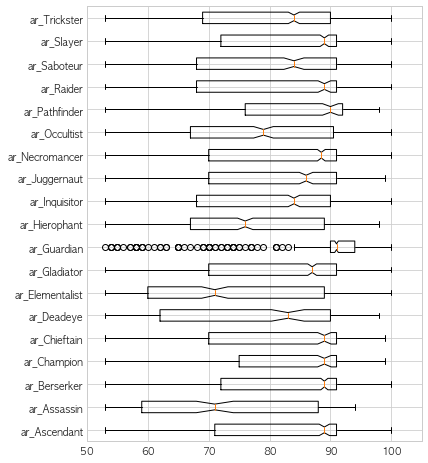

In [39]:
# boxplot
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 8)
plt.boxplot([ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, 
             ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, 
             ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, 
             ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster], notch = True, vert=False,)
plt.xlim(50, 105)
plt.yticks(range(1, len(list_level_ac)+1), list_level_ac)
plt.show()

#### Average and Boxplot result: 
- Obviously, you can see that the mean doesn't deviate significantly from the center of 80.  
Also, the minimum value of 53 indicates that the level to complete Lord's Labyrinth is already lower than 53, and guesses that it is the player's choice to not change to a Ascendancy class even though their levels are over 53, and to play Hardcore mode as Root class.  

- Many boxes are more similarly distributed each other than themselves in previous box plot result(include root classes). While, Guardian's level is not evenly distributed.  

#### 5-2-2-3. ANOVA

#### (1) Normality and skewness test: Shapiro-wilk test 

Do the same test, Shapiro-wilk test and skewness test.

In [40]:
list_level_ac = [ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster]

In [41]:
from scipy.stats import *
for cl, array in zip(list_class_ac, list_level_ac):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array))
    print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")
    if abs(stats.skew(array, bias = False)) > 2:
        print("> Skewness is over")
    print('\n')

# == Ascendant Shapiro-wilk test ==
ShapiroResult(statistic=0.8464069366455078, pvalue=1.406005808364913e-34)
Skewness: 0.7893670910990487


# == Assassin Shapiro-wilk test ==
ShapiroResult(statistic=0.9036740064620972, pvalue=7.442096938703457e-11)
Skewness: 0.1244514503420714


# == Berserker Shapiro-wilk test ==
ShapiroResult(statistic=0.8378379344940186, pvalue=1.401298464324817e-45)
Skewness: 0.915622629806766


# == Champion Shapiro-wilk test ==
ShapiroResult(statistic=0.8304262161254883, pvalue=7.788036228770405e-23)
Skewness: 1.0953560032842702


# == Chieftain Shapiro-wilk test ==
ShapiroResult(statistic=0.8603966236114502, pvalue=1.0740052335092418e-27)
Skewness: 0.7549078959756601


# == Deadeye Shapiro-wilk test ==
ShapiroResult(statistic=0.8607589602470398, pvalue=7.343571517754496e-15)
Skewness: 0.3566468145186242


# == Elementalist Shapiro-wilk test ==
ShapiroResult(statistic=0.9213810563087463, pvalue=1.9562258104090062e-14)
Skewness: 0.1957251199150377


# == Gladiato

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/4171972888.py:5: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/4171972888.py:8: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  if abs(stats.skew(array, bias = False)) > 2:


####  Normality test results:

- Again, there seems to be no class group that meets normality.  
However, since the number of samples is sufficient, we will do a nonparametric test together as in the previous process.  
- Only `Guardian` wasn't satisfying the skewness test. (I think it's because of the data distribution in `Guardian`.)

#### (2) Equal-Variance test

(Same as 5-2-2-3.)
I tested by two test methods, Levene and Fligner-Killeen.  
- Bartlett test which is a popular method must be normality in data, and the Levene test is less sensitive to normality.   
- And the Fligner-Killeen test, it is said that some nonparametric tests do not correlate with the size or probability distribution of the sample.  

In [42]:
levene(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

LeveneResult(statistic=19.50933992619784, pvalue=5.140670860355577e-63)

In [43]:
fligner(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

FlignerResult(statistic=426.9406872025966, pvalue=2.1711734879244195e-79)

#### Equal-Variance test results

All _ascending class_'s data satisfied equal variancy.

#### (3) One-way ANOVA 


In [44]:
f_oneway(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

F_onewayResult(statistic=40.279711833420265, pvalue=1.1827777562413295e-139)

#### One-way ANOVA results
- The p-value is under 0.05 and it could be said that there're meaningful differences between all _ascending class_ levels.  
- But the statistic is discrimed markedly, and the p-value is little rised from `pvalue=2.38182378124225e-310`.

And, as the same above result(All classes), the level data didn't satisfy normality, so I added the non-parametric tests, the Kruskal-Wallis H test.  

#### (4) Kruskal-Wallis H test

In [45]:
kruskal(ar_Ascendant, ar_Assassin, ar_Berserker, ar_Champion, ar_Chieftain, ar_Deadeye, ar_Elementalist, ar_Gladiator, ar_Guardian, ar_Hierophant, ar_Inquisitor, ar_Juggernaut, ar_Necromancer, ar_Occultist, ar_Pathfinder, ar_Raider, ar_Saboteur, ar_Slayer, ar_Trickster)

KruskalResult(statistic=785.4197796362981, pvalue=4.020047495113338e-155)

#### Kruskal-Wallis H test results:

- The p-value is under 0.05 so it could be said that there're differences between ascending class' levels.  

- But the p-value is remarkably bigger (like One-way ANOVA results) than the results from all classes. (`3.928809290642803e-275`) I can't imagine how big the gap size is.  

(We already know, `Guardian`, but) let's uncover what classes are different from other classes.  

#### (5) Post-hoc 1 : Bonferroni

_this contents writing is the same as above Bonferroni, so you could pass this part._  

    The number of samples is different in each class, so I choose Bonferroni's test and Scheffe's test.  
    This is because it can be used in both parametric and non-parametric methods, and can be used even if the number of samples is different.  
    However, the more comparison groups, the weaker the power in Bonferroni's, so a strict method of the Scheffe test will also be added next.

In [46]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_dead_ac['level'], df_dead_ac['class'])
tb2, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3650526169.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tb2, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')


In [47]:
# save the `statsmodels.iolib.table.SimpleTable` type result(tb2) to csv
with open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb2.csv','w') as fh:
    fh.write(tb2.as_csv())

# call the info of the results, 3 lines.
fh2 = open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb2.csv', 'r')
for i in range(3):
    line = fh2.readline()
    print(line)
    pass
fh2.close()

# load the data from csv file, except the result info lines.
# the columns have 'space' because of the table form previous itself
# alias: df_bonftmp -> df_bonfactmp
df_bonfactmp = pd.read_csv("tb2.csv", header = 3)
df_bonfactmp.columns = columns = ['group1', 'group2', 'stat', 'pval', 'pval_corr', 'reject']

# reject column data is object type including 'space'.
# array(['True  ', 'False '], dtype=object)
# correct the data to 1 or 0
df_bonfactmp.loc[df_bonfactmp['reject']=='True  ', 'reject'] = 1
df_bonfactmp.loc[df_bonfactmp['reject']=='False ', 'reject'] = 0

# and group1 and group2 columns have Mysterious 'Space' Format too, so edit it.
df_bonfactmp['group1'] = df_bonfactmp['group1'].str.replace(" ", "")
df_bonfactmp['group2'] = df_bonfactmp['group2'].str.replace(" ", "")

Test Multiple Comparison ttest_ind 

FWER=0.05 method=bonf

alphacSidak=0.00, alphacBonf=0.000



In [48]:
# check the reject 'True' and descending order by the p-value
# (p-value < 0.05, the average difference has meaning.)
df_bonfactmp.loc[df_bonfactmp['reject']==1].sort_values('pval', ascending = False).head(10)

,group1,group2,stat,pval,pval_corr,reject
79,Chieftain,Trickster,3.6548,0.0003,0.0451,1
126,Hierophant,Inquisitor,-3.7678,0.0002,0.0290,1
58,Champion,Juggernaut,3.8772,0.0001,0.0189,1
144,Juggernaut,Occultist,4.0177,0.0001,0.0106,1
39,Berserker,Gladiator,4.0296,0.0001,0.0097,1
14,Ascendant,Raider,3.8547,0.0001,0.0203,1
59,Champion,Necromancer,3.8171,0.0001,0.0235,1
21,Assassin,Deadeye,-3.9796,0.0001,0.0136,1
110,Gladiator,Occultist,4.1748,0.0000,0.0053,1
105,Gladiator,Guardian,-13.1432,0.0000,0.0000,1


There's not _root classes_, so it will be `nan`.

In [49]:
rootclasses = ['Duelist', 'Marauder', 'Ranger', 'Scion', 'Shadow', 'Templar', 'Witch']
root_ratio = df_bonfactmp.loc[(df_bonfactmp['group1'].isin(rootclasses))|
                            (df_bonfactmp['group2'].isin(rootclasses))]
root_ratio['reject'].mean()

nan

And let's check the _ascending classes_'s reject ratio.

In [50]:
# this is same with `df_bonfactmp['reject'].mean()`
asce_ratio = df_bonfactmp.loc[~( (df_bonfactmp['group1'].isin(rootclasses))|
                            (df_bonfactmp['group2'].isin(rootclasses)) )]
asce_ratio['reject'].mean()

0.631578947368421

The ratio is bigger than the one(0.6198830409356725) of all classes' Bonferroni results, but it is almost the same level.  
We can see that **the meaningful level difference in the level between each class is still obvious.**

We also check by visualizing the difference.

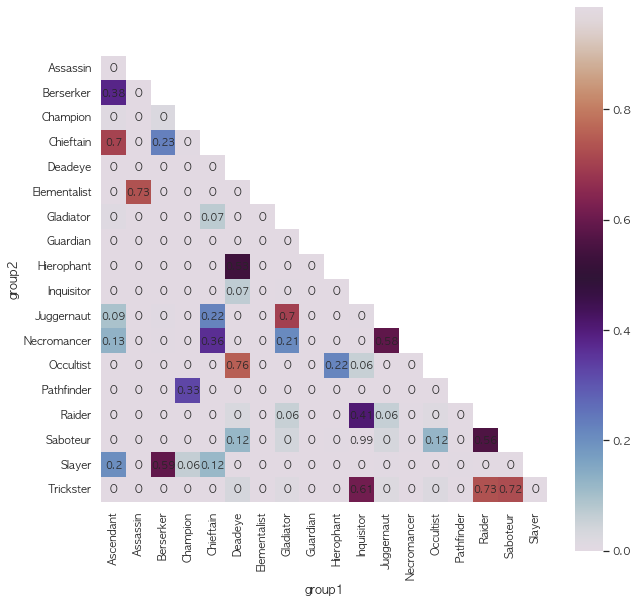

In [92]:
# Bonferroni's test result visualization
df_bonfheat = df_bonfactmp.pivot_table(values = 'pval', 
                                     index = 'group1', columns = 'group2').T
# # It doesn't need to mask (np.nan are already there)
# mask = np.zeros_like(df_sche)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_bonfheat.shape[1]):
    for j in range(df_bonfheat.shape[0]):
        if (df_bonfheat.iat[j, i] < 0.05):
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')
        elif i<=j:
            plt.text(i+0.5, j+0.5, round(df_bonfheat.iat[j, i], 2), ha='center', va='center')

sns.heatmap(data = df_bonfheat, cmap = 'twilight', square = True)
plt.show()

#### Bonferroni test results:

Remind the reason why we do the test without _root class_.

The previous results interpretation was this:  
        
    There is a problem, the `reject` result is difficult to explain easily because it is too large to compare the results of them(Root and Ascendancy).  
    And I compared the reject ratio between when the class is 'root classes' and 'ascendancy classes'. (Among the two ratios, if one has a different markedly, thinking by dividing 'root class' and 'ascendancy class' is valid.)  
    The gap between the two reject ratios isn't little.  
    This clearly shows that it can be useful to think of _root class_ and _ascending class_ separately.  

I thought the level difference would be significant because of the 'root class'(with the various reasons why _root classes_ are in Hardcore mode), but **it was half right and half wrong.**  

As this test results, it seems that there were quite a few differences between the _ascending classes_, too.

So I changed my opinion to consider that class and level are related.

Let's do Scheffe's test.

#### (6) Post-hoc 2 : Scheffe 

In [52]:
import scikit_posthocs as sp
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{: .4f}'.format)
df_sche_ac = sp.posthoc_scheffe(df_dead_ac, val_col = 'level', group_col = 'class')
df_sche_ac

,Ascendant,Assassin,Berserker,Champion,Chieftain,Deadeye,Elementalist,Gladiator,Guardian,Hierophant,Inquisitor,Juggernaut,Necromancer,Occultist,Pathfinder,Raider,Saboteur,Slayer,Trickster
Ascendant,1.0000,0.0000,1.0000,0.9938,1.0000,0.1739,0.0000,0.9944,0.0000,0.0000,0.1176,1.0000,1.0000,0.0149,0.8830,0.5657,0.7708,1.0000,0.3301
Assassin,0.0000,1.0000,0.0000,0.0000,0.0000,0.3485,1.0000,0.0000,0.0000,0.2363,0.0000,0.0000,0.0000,0.0522,0.0000,0.0000,0.0007,0.0000,0.0000
Berserker,1.0000,0.0000,1.0000,0.9994,1.0000,0.0363,0.0000,0.6110,0.0000,0.0000,0.0007,0.9925,0.9718,0.0003,0.9568,0.0448,0.3298,1.0000,0.0088
Champion,0.9938,0.0000,0.9994,1.0000,0.9886,0.0063,0.0000,0.3469,0.0002,0.0000,0.0029,0.7652,0.7076,0.0002,1.0000,0.0335,0.0954,1.0000,0.0124
Chieftain,1.0000,0.0000,1.0000,0.9886,1.0000,0.3594,0.0000,0.9999,0.0000,0.0000,0.5216,1.0000,1.0000,0.0952,0.8526,0.9075,0.9352,1.0000,0.7770
Deadeye,0.1739,0.3485,0.0363,0.0063,0.3594,1.0000,0.1878,0.7802,0.0000,1.0000,0.9999,0.7940,0.4489,1.0000,0.0011,0.9966,1.0000,0.0245,0.9989
Elementalist,0.0000,1.0000,0.0000,0.0000,0.0000,0.1878,1.0000,0.0000,0.0000,0.0419,0.0000,0.0000,0.0000,0.0041,0.0000,0.0000,0.0000,0.0000,0.0000
Gladiator,0.9944,0.0000,0.6110,0.3469,0.9999,0.7802,0.0000,1.0000,0.0000,0.0006,0.9566,1.0000,1.0000,0.4337,0.1136,0.9998,0.9996,0.5230,0.9966
Guardian,0.0000,0.0000,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400,0.0000,0.0000,0.0000,0.0000
Hierophant,0.0000,0.2363,0.0000,0.0000,0.0000,1.0000,0.0419,0.0006,0.0000,1.0000,0.6919,0.0076,0.0000,1.0000,0.0000,0.3102,0.9581,0.0000,0.4530


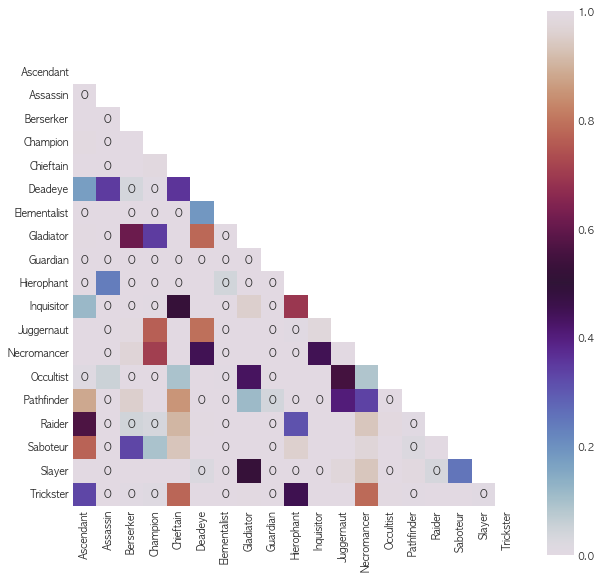

In [53]:
# Scheffe's test:
mask = np.zeros_like(df_sche_ac)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 10))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_sche_ac.shape[1]):
    for j in range(df_sche_ac.shape[0]):
        if (df_sche_ac.iat[i, j] < 0.05) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_sche_ac, mask = mask, cmap = 'twilight', square = True)
plt.show()

#### Scheffe test results:
I marked the p-values which are less than 0.05 and the classes.  
Some classes are markable, Elementalist, Guardian, and Hierophant. They have many 'O' marks.   
In other words, their level values are quite different from the other classes so the ascending classes show a little dependency on class.

### result2:

There was a meaningful level difference between classes.  
It's caused by the class system in the game, especially changing the class to ascendancy classes which can use more skill points for various on-hand skills.  

Resultingly, the most apparent difference was between _root class_ and _ascending class_, and secondly, the difference was also meaningful among  _ascending classes_.


And I think dividing the classes into some clusters makes the problem(about _root class_ and _ascending class_) simple.  
The next chapter is it.

## 5-3. grouping them by _root class_ 

In my opinion, considering the degree of freedom and analyzing profoundly the 'class', it doesn't matter if you combine their classes with the chosen 'stat' like strength, dexterity, or intelligence.

- Because each *ascending class* is advanced from its *root class* (which is divided by stats).
- Also, since the classes are divided by kind of 'stats' within the Path of Exile game, comparing after making them(ascending and root) to clusters according to each 'stats', might be rather to have the advantage of obtaining a large number of samples.

Therefore, it would be fun to use the data from the *root class* as well and compare all classes with the classes before choosing the *ascending classes*. Please check below.

In [54]:
# Clustering ascending classes into root class
# One stat clusters
M = ['Marauder', 'Juggernaut', 'Berserker', 'Chieftain'] # Strength; Marauder
W = ['Witch', 'Necromancer', 'Elementalist', 'Occultist'] # Intelligence; Witch
R = ['Ranger', 'Raider', 'Deadeye', 'Pathfinder'] # Dexterity; Ranger

# Two stats clusters
D = ['Duelist', 'Slayer', 'Gladiator', 'Champion'] # Strength, Dexterity; Duelist
S = ['Shadow', 'Assassin', 'Saboteur', 'Trickster'] # Dexterity, Intelligence; Shadow
T = ['Templar', 'Inquisitor', 'Hierophant', 'Guardian'] # Intelligence, Strength; Templar

# Three stats clusters
Sc = ['Scion', 'Ascendant'] # Strength, Dexterity, Intelligence; Scion

# Making a column; df_dead['root']
df_dead.loc[df_dead['class'].isin(M), 'root'] = 'M'
df_dead.loc[df_dead['class'].isin(W), 'root'] = 'W'
df_dead.loc[df_dead['class'].isin(R), 'root'] = 'R'

df_dead.loc[df_dead['class'].isin(D), 'root'] = 'D'
df_dead.loc[df_dead['class'].isin(S), 'root'] = 'S'
df_dead.loc[df_dead['class'].isin(T), 'root'] = 'T'

df_dead.loc[df_dead['class'].isin(Sc), 'root'] = 'Sc'

In [55]:
# checking
df_dead['root'].unique()

array(['Sc', 'S', 'M', 'D', 'R', 'W', 'T'], dtype=object)

### 5-3-1. clusters' correlation

In [56]:
df_deads_rootonehot = pd.get_dummies(df_dead[['root', 'level']], drop_first = False)
pd.set_option('display.float_format', '{: .4f}'.format)
df_deads_rootonehot.corr()

,level,root_D,root_M,root_R,root_S,root_Sc,root_T,root_W
level,1.0000,0.0394,0.0422,-0.0082,-0.0504,0.0175,-0.0141,-0.0416
root_D,0.0394,1.0000,-0.2780,-0.1672,-0.1739,-0.1432,-0.1989,-0.2492
root_M,0.0422,-0.2780,1.0000,-0.1671,-0.1738,-0.1431,-0.1987,-0.2490
root_R,-0.0082,-0.1672,-0.1671,1.0000,-0.1045,-0.0861,-0.1195,-0.1498
root_S,-0.0504,-0.1739,-0.1738,-0.1045,1.0000,-0.0895,-0.1243,-0.1558
root_Sc,0.0175,-0.1432,-0.1431,-0.0861,-0.0895,1.0000,-0.1023,-0.1282
root_T,-0.0141,-0.1989,-0.1987,-0.1195,-0.1243,-0.1023,1.0000,-0.1781
root_W,-0.0416,-0.2492,-0.2490,-0.1498,-0.1558,-0.1282,-0.1781,1.0000


/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


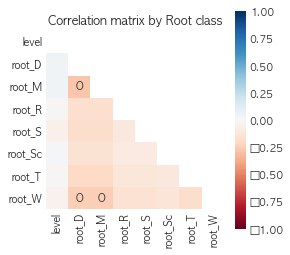

In [57]:
mask = np.zeros_like(df_deads_rootonehot.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (4, 4))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_deads_rootonehot.corr().shape[1]):
    for j in range(df_deads_rootonehot.corr().shape[0]):
        if (abs(df_deads_rootonehot.corr().iat[i, j]) > 0.2) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')

sns.heatmap(data = df_deads_rootonehot.corr(), cmap = 'RdBu', mask=mask, square = True, vmin = -1, vmax = 1)
plt.title('Correlation matrix by Root class')
plt.show()

#### correlation heatmap result:

There's some correlation between Duelist, Marauder and Witch.  
- Duelist and Marauder have a common in using strength stat.
- And Marauder and Witch have a commonality in using only one stat, strength or Intelligence.  

We can conjecture that commonality in a class' stat can bring a relatively high correlation in level.  

### 5-3-2. ANOVA test (class cluster)
#### 5-3-2-1.  Average level
Compare each _root class_'s level by ANOVA.

In [58]:
pd.set_option('display.float_format', '{: .2f}'.format)
df_dead.groupby('root')[['level']].describe()

level                                                  
        count   mean    std    min    25%    50%    75%     max
root                                                           
D     4480.00  81.20  12.48  53.00  71.00  89.00  91.00  100.00
M     4475.00  81.27  12.36  53.00  71.00  89.00  91.00  100.00
R     1880.00  79.89  14.00  53.00  68.00  89.00  91.00  100.00
S     2018.00  78.24  13.30  53.00  68.00  81.00  90.00  100.00
Sc    1412.00  81.07  13.09  53.00  70.00  89.00  91.00  100.00
T     2561.00  79.74  13.21  53.00  69.00  86.00  91.00  100.00
W     3755.00  79.08  13.41  53.00  68.00  84.00  91.00  100.00

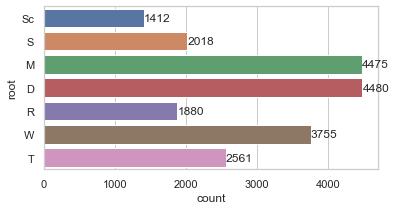

In [59]:
plt.rcParams["figure.figsize"] = (6, 3)
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(y = 'root', data = df_dead, 
                   order = df_dead['root'].unique().sort())
for container in ax.containers:
    ax.bar_label(container)
plt.show()

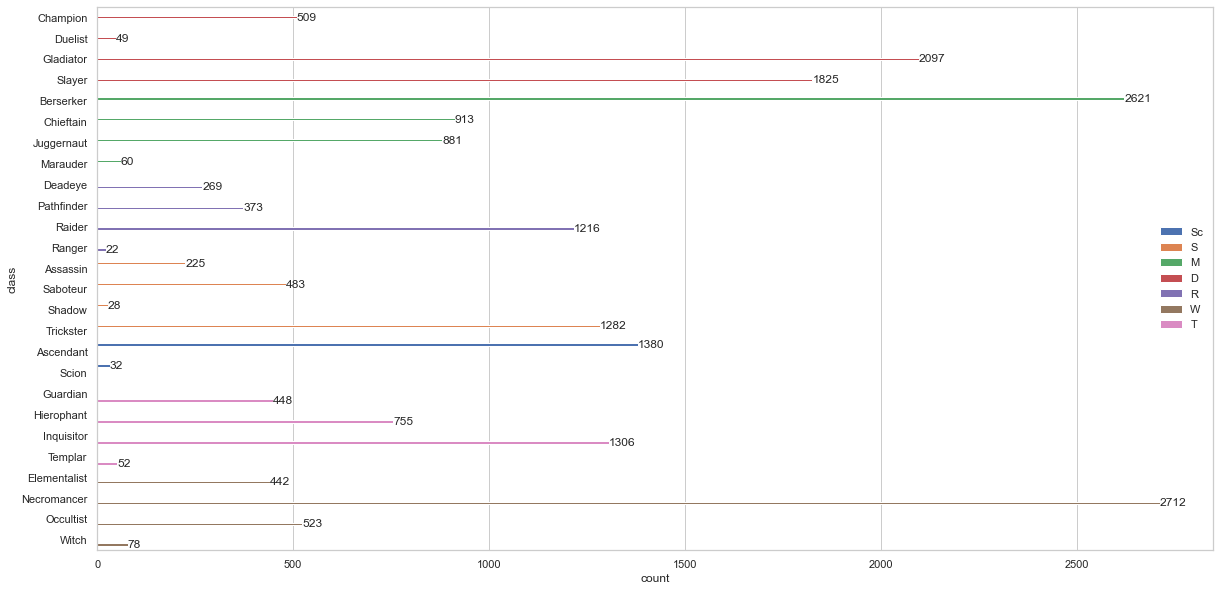

In [60]:
# container idea : reference code : 
# https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
plt.rcParams["figure.figsize"] = (20, 10)
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(y = 'class', hue = 'root', data = df_dead, saturation = 1, 
                   order = df_dead.sort_values(['root', 'class'])['class'].unique())
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc = 'center right')
plt.show()

#### 5-3-2-2. Boxplot by class
Get a boxplot and compare their average. 

In [61]:
# data division
# make a each classes array for repeatation
df_dead.sort_values(['root'], inplace = True)
list_class_r = df_dead['root'].unique()

# list_level_r = []
for c in list_class_r:
    condition = (df_dead['root'] == c)
    df_bin = df_dead.loc[condition]
    globals()["root_{}".format(c)] = np.array(df_bin['level'])
#     list_level.append(globals()["ar_{}".format(c)])

# make a variate list
list_level_r = []
for c in list_class_r:
    d = 'root_' + c
    list_level_r.append(d)

In [62]:
list_level_r

['root_D', 'root_M', 'root_R', 'root_S', 'root_Sc', 'root_T', 'root_W']

In [63]:
list_level_r = [root_D, root_M, root_R, root_S, root_Sc, root_T, root_W]

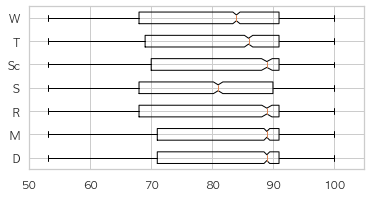

In [64]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 3)
plt.boxplot([root_D, root_M, root_R, root_S, root_Sc, root_T, root_W], notch = True, vert=False)
plt.xlim(50, 105)
plt.yticks(range(1, len(list_level_r)+1), list_class_r)
plt.show()

#### Average and boxplot result:
Shadow's level median is a little lower than others as shown in the table (81.00).  
But the level's distribution is quite similar.  

#### 5-3-2-3. ANOVA

#### (1) Normality test: Shapiro-wilk test 

The number of samples is over 30 all so that we can use Kolmogorov-Smirnov test but I use Shapiro-wilk for consistency.


In [65]:
from scipy.stats import *
for cl, array in zip(list_class, list_level):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array))
    print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")
    if abs(stats.skew(array, bias = False)) > 2:
        print("> Skewness is over")
    print('\n')

# == Ascendant Shapiro-wilk test ==
ShapiroResult(statistic=0.8464069366455078, pvalue=1.406005808364913e-34)
Skewness: 0.7893670910990486


# == Assassin Shapiro-wilk test ==
ShapiroResult(statistic=0.9036740064620972, pvalue=7.442096938703457e-11)
Skewness: 0.12445145034207133


# == Berserker Shapiro-wilk test ==
ShapiroResult(statistic=0.8378379344940186, pvalue=1.401298464324817e-45)
Skewness: 0.9156226298067661


# == Champion Shapiro-wilk test ==
ShapiroResult(statistic=0.8304262161254883, pvalue=7.788036228770405e-23)
Skewness: 1.09535600328427


# == Chieftain Shapiro-wilk test ==
ShapiroResult(statistic=0.8603966236114502, pvalue=1.0740052335092418e-27)
Skewness: 0.7549078959756601


# == Deadeye Shapiro-wilk test ==
ShapiroResult(statistic=0.8607589602470398, pvalue=7.343571517754496e-15)
Skewness: 0.3566468145186242


# == Duelist Shapiro-wilk test ==
ShapiroResult(statistic=0.8795055150985718, pvalue=0.0001255940442206338)
Skewness: 0.8906833141117315


# == Elementalist S

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3998002070.py:5: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3998002070.py:8: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  if abs(stats.skew(array, bias = False)) > 2:


In [66]:
from scipy.stats import *
for cl, array in zip(list_class_r, list_level_r):
    print("# == {} Shapiro-wilk test ==".format(cl))
    print(shapiro(array))
    print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
    if shapiro(array)[1] > 0.05:
        print("> Normality satisfied")
    if abs(stats.skew(array, bias = False)) > 2:
        print("> Skewness is over")
    print('\n')

# == D Shapiro-wilk test ==
ShapiroResult(statistic=0.8610715270042419, pvalue=0.0)
Skewness: 0.798496273736727


# == M Shapiro-wilk test ==
ShapiroResult(statistic=0.8559562563896179, pvalue=0.0)
Skewness: 0.7998781130525152


# == R Shapiro-wilk test ==
ShapiroResult(statistic=0.8410778045654297, pvalue=8.112677329362096e-40)
Skewness: 0.629927140278398


# == S Shapiro-wilk test ==
ShapiroResult(statistic=0.8958292603492737, pvalue=6.012082502464268e-35)
Skewness: 0.3980666611929861


# == Sc Shapiro-wilk test ==
ShapiroResult(statistic=0.8490917682647705, pvalue=1.1123332256015569e-34)
Skewness: 0.7358799688362246


# == T Shapiro-wilk test ==
ShapiroResult(statistic=0.8847988247871399, pvalue=4.627984360217714e-40)
Skewness: 0.5056930933140052


# == W Shapiro-wilk test ==
ShapiroResult(statistic=0.8884855508804321, pvalue=0.0)
Skewness: 0.46881752167342844




/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3724267159.py:5: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print("Skewness: {}".format(abs(stats.skew(array, bias = False))))
/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/3724267159.py:8: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  if abs(stats.skew(array, bias = False)) > 2:


#### Normality test results:
Any group doesn't satisfy normality. 

#### (2) Equal-Variance test
The below script is the same as the previous Equal-variance test's one.   

    I tested by two test methods, Levene and Fligner-Killeen. Bartlett test must be normality in data, and the Levene test is less sensitive to normality. And the Fligner-Killeen test, it is said that some nonparametric tests do not correlate with the size or probability distribution of the sample.  

In [67]:
levene(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

LeveneResult(statistic=26.577259509578322, pvalue=1.030330931884292e-31)

In [68]:
fligner(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

FlignerResult(statistic=236.78709722094757, pvalue=2.7245660220092474e-48)

#### Equal-Variance test results: 

All root class clusters' satisfied equal variance.

#### (3) One-way ANOVA 


In [69]:
f_oneway(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

F_onewayResult(statistic=23.578964385390943, pvalue=6.1547634459814315e-28)

In [70]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('level ~ C(root)', df_dead).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(root),6.00,23858.92,3976.49,23.58,0.00
Residual,20574.00,3469712.28,168.65,NaN,NaN


#### One-way ANOVA results:
The p-value is under 0.05 and it could be said that there're differences between all class levels.  

And I noticed that the statistic is smaller than previous ANOVA statistics(all classes ANOVA statistic was `63.98606057045286`, and only _ascending classes_ ANOVA statistic was `40.279711833420265`.).  

Let's briefly check the statistic when we analysis only _root class_.

In [71]:
df_dead_root = df_dead.loc[df_dead['class'].isin(rootclasses)]

In [72]:
model = ols('level ~ C(root)', df_dead_root).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(root),6.00,320.57,53.43,1.29,0.26
Residual,314.00,12963.60,41.29,NaN,NaN


The more classes you compare, the larger the statistics are. However, as expected, the statistics are less when compared with only the *ascending classes* and *root classes.* 

Let's think a little bit about the statistics themselves and move on.

- The f-statistic is the variance between the sample means divided by the variance within the sample. The larger the within-group variance (the degree of difference between groups), the less meaningful the difference between the means.
- Currently, many ascending classes have higher level average levels than root classes, so the overall group average increases as you compare them, including ascending classes.
On the other hand, because of the root class, which records an extremely lower average than ascending class, the variance within the group increases. There's a reason why the first ANOVA result had an f statistic of 63.986.
- After dividing the group according to the stat ability(strength, dexterity, intelligence), you can see that it has decreased significantly. In other words, in this case, the more severe the difference is, the higher the f statistic.

#### (4) Kruskal-Wallis H test
And the data doesn't satisfy normality, so test it once more with Kruskal-Wallis H test.


In [73]:
kruskal(root_D, root_M, root_R, root_S, root_Sc, root_T, root_W)

KruskalResult(statistic=108.21689296656184, pvalue=4.814482244592165e-21)

#### Kruskal-Wallis H test results:

The statistic said that the samples have differences. Let's check with a heatmap.

#### (5) Post-hoc 1 : Bonferroni

In [74]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df_dead['level'], df_dead['root'])
tb3, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')

/var/folders/qw/j72d9nwn5dq0vxtqtw2bbtnh0000gp/T/ipykernel_48129/790554817.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  tb3, a1, a2 = comp.allpairtest(stats.ttest_ind, method = 'bonf')


In [75]:
# save the `statsmodels.iolib.table.SimpleTable` type result(tb3) to csv
with open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb3.csv','w') as fh:
    fh.write(tb3.as_csv())

# call the info of the results, 3 lines.
fh2 = open('/Users/Angela/Desktop/Personal/toy3_POE_kaggle/tb3.csv', 'r')
for i in range(3):
    line = fh2.readline()
    print(line)
    pass
fh2.close()

# load the data from csv file, except the result info lines.
# the columns have 'space' because of the table form previous itself
# alias: df_bonftmp -> df_bonfactmp
df_bonfroottmp = pd.read_csv("tb3.csv", header = 3)
df_bonfroottmp.columns = columns = ['group1', 'group2', 'stat', 'pval', 'pval_corr', 'reject']

# reject column data is object type including 'space'.
# array(['True  ', 'False '], dtype=object)
# correct the data to 1 or 0
df_bonfroottmp.loc[df_bonfroottmp['reject']=='True  ', 'reject'] = 1
df_bonfroottmp.loc[df_bonfroottmp['reject']=='False ', 'reject'] = 0

# and group1 and group2 columns have Mysterious 'Space' Format too, so edit it.
df_bonfroottmp['group1'] = df_bonfroottmp['group1'].str.replace(" ", "")
df_bonfroottmp['group2'] = df_bonfroottmp['group2'].str.replace(" ", "")

Test Multiple Comparison ttest_ind 

FWER=0.05 method=bonf

alphacSidak=0.00, alphacBonf=0.002



In [76]:
# check the reject 'True' and descending order by the p-value
# (p-value < 0.05, the average difference has meaning.)
df_bonfroottmp.loc[df_bonfroottmp['reject']==1].sort_values('pval', ascending = False)

,group1,group2,stat,pval,pval_corr,reject
18,Sc,T,3.04,0.00,0.05,1
1,D,R,3.69,0.00,0.00,1
11,R,S,3.78,0.00,0.00,1
6,M,R,3.91,0.00,0.00,1
16,S,T,-3.81,0.00,0.00,1
2,D,S,8.67,0.00,0.00,1
4,D,T,4.63,0.00,0.00,1
5,D,W,7.42,0.00,0.00,1
7,M,S,8.93,0.00,0.00,1
9,M,T,4.88,0.00,0.00,1


And let's check the root's reject ratio.

In [77]:
df_bonfroottmp['reject'].mean()

0.6190476190476191

The reject ratio came out to a similar level as all classes' Bonferroni results(0.6198830409356725).  
And the result said that **the meaningful difference in the level between each _root class_ is still obvious.**

We also check by visualizing the difference.

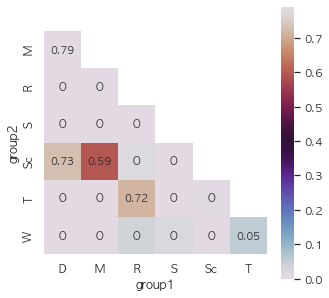

In [91]:
# Bonferroni's test result visualization
df_bonfheat = df_bonfroottmp.pivot_table(values = 'pval', 
                                     index = 'group1', columns = 'group2').T
# # It doesn't need to mask (np.nan are already there)
# mask = np.zeros_like(df_sche)
# mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (5, 5))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_bonfheat.shape[1]):
    for j in range(df_bonfheat.shape[0]):
        if (df_bonfheat.iat[j, i] < 0.05):
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')
        elif i<=j:
            plt.text(i+0.5, j+0.5, round(df_bonfheat.iat[j, i], 2), ha='center', va='center')


sns.heatmap(data = df_bonfheat, cmap = 'twilight', square = True)
plt.show()

#### Bonferroni test results:

As you see, between classes have meaningful differences observed.  
Especially Shadow looked like have a significant difference between all classes.  

Let's do Scheffe's test.

#### (6) Post-hoc 2 : Scheffe 

In [79]:
import scikit_posthocs as sp
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{: .4f}'.format)
df_sche_r = sp.posthoc_scheffe(df_dead, val_col = 'level', group_col = 'root')
df_sche_r

,D,M,R,S,Sc,T,W
D,1.0000,1.0000,0.0357,0.0000,1.0000,0.0021,0.0000
M,1.0000,1.0000,0.0205,0.0000,0.9997,0.0009,0.0000
R,0.0357,0.0205,1.0000,0.0153,0.3564,0.9999,0.5622
S,0.0000,0.0000,0.0153,1.0000,0.0000,0.0197,0.4787
Sc,1.0000,0.9997,0.3564,0.0000,1.0000,0.1468,0.0005
T,0.0021,0.0009,0.9999,0.0197,0.1468,1.0000,0.6881
W,0.0000,0.0000,0.5622,0.4787,0.0005,0.6881,1.0000


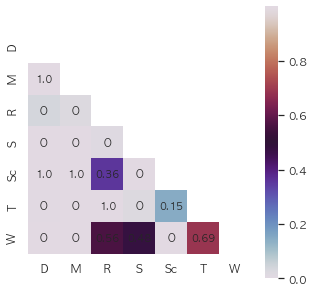

In [80]:
# Scheffe's test visualization:
mask = np.zeros_like(df_sche_r)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (5, 5))

# 'O' mark: checking values which over significance level(0.05)
for i in range(df_sche_r.shape[1]):
    for j in range(df_sche_r.shape[0]):
        if (df_sche_r.iat[i, j] < 0.05) and (i<j) :
            plt.text(i+0.5, j+0.5, 'O', ha='center', va='center')
        elif i<j:
            plt.text(i+0.5, j+0.5, round(df_sche_r.iat[i, j], 2), ha='center', va='center')

sns.heatmap(data = df_sche_r, mask = mask, cmap = 'twilight', square = True)
plt.show()

#### Scheffe's test result:

Unexpectedly, there are less meaningful differences in Scheffe's test result. 

But it isn't changed that the classes have differences between themselves.  

### results3:

When even all classes are grouped by _root class_, differences are observed.  
As a result, we can tell some classes have a different level distribution from other classes.  
In other words, there's a dependency between class and level in Hardcore mode dead character's data.  


## 5-3-3. 'what class did they play?' - 이것을 떼어서, 그룹화 해서 보기 전에 넣는 것으로 하자.
I got the numbers of the players(accounts) who played only root class or ascending class, or both of them.  
And I compared and analyzed the number rate and ranks(not level!) of them, complexly and organizationally.

갑자기 이건 무슨 분석인가?
- 랭크에 오른 사람들 중 루트 클래스만 한 사람들은 몇이 나 있는지, 몇 퍼센트나 되고, 레벨이 아니라 랭크(그래서 얼마나 잘했는데?) 분포가 어센딩 클래스와 어떻게 다른지.  
 그런 것들을 보기 위해 루트 클래스와 어센딩 클래스 모두를 플레이 한 사람들의 숫자, 둘 중 하나만 플레이한 숫자를 보았습니다.
- 물론 교집합과 각각의 차집합을 구한 것이기 때문에 그 셋의 합이 데이터 length와 같지는 않습니다. 교집합이라는게 있는 것이기 때문(이 부분에서 어제 잠시 헷갈림)
- 그리고 그들의 비율과, ranks를 복잡하고 유기적으로 비교해보았습니다.

###### **Why is this analysis necessary?**

I thought that the logical basis for clustering in some grouped class by 'root' or 'ascending' must need in this question.  

이렇게 본 이유  
- 루트 클래스 그룹으로 묶어보는 것이 합당한 이유(데이터 사이즈 차이) 논리 보충을 위해서  
    실제로 ascending class만 한 사람보다 root class만 올린 사람들의 수가 압도적으로 적을 경우 분명한 성능차이가 있어서 그럴 가능성이 있습니다. 
    만약 그 사람들의 ascending class character의 rank보다 root class의 rank가 높은 경우의 수와, 높은 정도를 비교했을 때 훨씬 더 높게 나타난다면, 두 class의 계층간에 확실한 차이가 있다는 것을 알 수 있습니다.  
    그리고 그렇게 차이가 난다면, root 클래스를 따로 떼어서 보는 것이 마땅합니다. 당연히 차이가 나는 것을 두는 것과 같은 논리이기 때문입니다.  
    예를 들어 설명하자면, 여러 말들이 한 시간에 각각 얼마나 갈 수 있는지를 보기 위해서는, 그들이 모두 성마인지 혹은 망아지인지 생각해보아야 한다는 것입니다. 그들의 능력을 다르게 할 수 있는 다른 요소들을 제거하는 의미에서 그들을 비슷한 선상에서 비교할 수 있도록, 섞여있다면 나이에 따라 그룹을 묶어 본다던가, 성체의 어릴적 기록을 가져와서 함께 비교를 한다던가가, 마치 데이터 스케일링 과정을 거치는 것과 비슷합니다.  
    다시 말해, 우리가 구하는 의존성의 유무가 의미있기 위해선 모든 클래스가 평등한 위치에 있어야한다고 생각했고, 26개 모든 클래스를 함께 비교한 후, 두 클래스를 분리하여 각각의 차이를 함께 비교하는 과정도 거칠겁니다.  

###### **So what does this mean?**

1. RANK COMPARING between who only played root class and not. (the latter: random sampling)
2. RANK COMPARING between who played both class and not. 


그래서 이게 의미하는 것
1. 루트 클래스 만으로 올라온 사람들의 랭크와, 그렇지 않은 사람들의 랭크를 각각 같은수대로(후자는 같은 양을 랜덤샘플링 해서 비교하자) 비교를 해보자.  
    실제로 비슷한 수준을 나타낸다면, 루트 클래스로도 비슷한 수준의 랭크에 올라오는 것 자체가 아주 어려운 일이 아니고(그말은 도전적인 일이 아니고 비슷한 성능을 낼 수 있다는 뜻일 수도 있다.), root 클래스를 뗴놓고 보거나 그냥 일부 직업군으로 뭉뚱그려 보는 것이 합당해진다.  
2. 실제로 루트 클래스와 둘 다 랭크에 올린 사람들의 실력을 그 외의 사람들과 비교해보자. 만약 이들의 ascending class rank가 비슷한 수준을 나타낸다면, 그들은 그들만의 어떤 이유로 root class를 플레이한 것일 것이다. 그러나 만약 더 좋은 rank를 보인다면 그들의 플레이실력이 좋아서, root class로도 rank에 올렸을 가능성이 있을 수도 있다는 것이다. 마치 레벨이 몇 되지 않는 캐릭터로 랭크에 올리고 뿌듯함(나쁘게 말해 우월감)을 느끼는 심리랄까.  

In [216]:
# only root class played accounts

# 1. 'ascending class' players' account
ascending_players = df[~df['class'].isin(rootclasses)]['account'].to_list()
# 2-1. 'root class' rows
df_rt = df.loc[df['class'].isin(rootclasses)]
# 3-1. searching '1' list in '2-1' DataFrame['account']
df_onlyrootplayed = df_rt[~df_rt['account'].isin(ascending_players)]
df_onlyrootplayed

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder,class_numbers
5230,1310,False,False,FrozenTheocracy,88,Marauder,d8bee7876d1d73ee030c7d2574d0d2270c9446a5a2c786...,1661086034,Warlock279,24,NaN,SSF Harbinger HC,NaN
9003,2256,False,False,Wintersorg,85,Marauder,7b93ae4d6bba754e6cebc50518b35f9cea736baf0b58e0...,1308994834,Sandman421,14,NaN,SSF Harbinger HC,NaN
9220,2311,False,False,Czardone,94,Ranger,5cd690e7d5b2092c1c763782a9d20440edd4fd6bcac1c5...,2678680422,azzmasterking,15,NaN,Hardcore Harbinger,NaN
9571,2399,False,False,DuDuCia_SSF,90,Marauder,dd90b4d7630137bcc29e761c8d5da905054894071461ea...,1934009687,shanghaibf4,21,NaN,SSF Harbinger,NaN
10283,2577,False,False,___Bazzerz,93,Ranger,e48d707f700618e142f17e98eee7e22418b5f480bd19af...,2631420928,PatrickBauler,15,NaN,Hardcore Harbinger,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59547,14943,True,False,Kaesemausi,53,Witch,801183f00c88f9f8dd6a8285f9fd5a944f1e385cb0144f...,78961307,Erzlori,28,NaN,SSF Harbinger HC,NaN
59588,14953,True,False,BoInYourFace,53,Templar,e4ba2a1e84afe966292d8a5f4c56737f27336b93cc6532...,78643887,obi36,11,NaN,SSF Harbinger HC,NaN
59625,14963,True,False,EPTotem,53,Templar,013d13bdd21405a02d440f913847526d3f897615911aa3...,78467939,xdanskx,17,NaN,SSF Harbinger HC,NaN
59635,14965,False,False,Bratakk,53,Templar,ab43cb5747cbcfdaeca5e92c4fd9379a8a4035cf564980...,78452021,WizardOfUz,8,NaN,SSF Harbinger HC,NaN


In [225]:
# only ascending class played accounts

# 1. 'root class' players' account
root_players = df[df['class'].isin(rootclasses)]['account'].to_list()
# 2-2. 'ascending class' row
df_ac = df.loc[~df['class'].isin(rootclasses)]
# 3-2. 
df_onlyasceplayed = df_ac[~df_ac['account'].isin(root_players)]
df_onlyasceplayed

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder,class_numbers
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger,NaN
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC,NaN
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger,NaN
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger,NaN
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59771,14999,True,False,ПроклятьеРекласта,89,Necromancer,d33b4f6e08c10e365765f9a36a8f36d561fd1d86f10ee1...,1786695653,Romanchik002,18,romanchik002,Hardcore Harbinger,NaN
59772,15000,False,False,IshibashiSummoner,94,Necromancer,5764cfa387e0a87a4bebc1a3c5017e92de8bbb06445c47...,2720770853,Ishibashisan,33,NaN,Harbinger,NaN
59773,15000,False,False,BLively,73,Slayer,9ac75ab75a47cee8a9dfb0a31912df8909720a8b20f9f1...,495034029,ruby01,19,NaN,SSF Harbinger,NaN
59774,15000,False,False,vawddvaw,89,Gladiator,cf02dfc0c90b2df9c7ac76bbedd91e93c2a8a2ca629c15...,1786638972,Lecarn,24,lecarn,Hardcore Harbinger,NaN


In [224]:
# both played accounts 

# 1. 'root class' players' account
root_players = df[df['class'].isin(rootclasses)]['account'].to_list()
# 2. rows which contain 'ascending class'  
df_ac = df.loc[~df['class'].isin(rootclasses)]
# 3. searching(intersection) '1' list in '2' DataFrame['account']
df_bothplayed = df_ac[df_ac['account'].isin(root_players)]
df_bothplayed

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder,class_numbers
378,95,False,False,PleaseDropAxe,95,Raider,bddccd5017087937b6144749cc590bace4feffe99a35d2...,2912415099,knowfear,24,knowfear823,SSF Harbinger HC,NaN
458,115,False,False,Shirnia_,94,Necromancer,5f908a777eba03be08d046c0f4380ba5cff59fe6515e10...,2819924367,Jeradin,29,jeradin_01,SSF Harbinger HC,NaN
491,124,True,False,Matayaruzeeeeeeeeeeeeee,94,Necromancer,435e145b2c44e389474f182df10bb14949eecc716b558e...,2801143426,mangoparfait,28,NaN,SSF Harbinger HC,NaN
523,132,False,False,ThanksForAIITheFish,94,Champion,4664af718265c283dc1254f7503ea8d9b1224ceefd9f35...,2759788183,Forty2,24,NaN,SSF Harbinger HC,NaN
649,163,True,False,Ninja_kage_SSFHHC,94,Raider,7e0bb673a3cc5b76d9a6b87c35eb26b030b600f8dab6b3...,2677170602,UMAIHONE,36,NaN,SSF Harbinger HC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59363,14897,True,False,TruusDeMier,53,Necromancer,53ee5d74dfac01367cff9c5d8eda5d7210fb5421e7b1ce...,79586376,Tryclyde,22,NaN,SSF Harbinger HC,NaN
59577,14951,True,False,Po_,53,Necromancer,5c21b3fcb5da3b85fed03bab13535d45455cb42bd95845...,78801384,popodamus,15,NaN,SSF Harbinger HC,NaN
59612,14959,True,False,Valocdpssfiel,53,Occultist,ebcd68b45aba4f52167871ba4503809fffd6b3df8cda10...,78553962,m3akpac,9,NaN,SSF Harbinger HC,NaN
59614,14960,True,False,Ptac_ReallySad,53,Pathfinder,8ac8f97227f82cb79b2c1537525918798b04d137300cc3...,78524895,Ptac,20,ptacattack,SSF Harbinger HC,NaN


In [223]:
df.shape

(59776, 13)

In [227]:
# 루트 클래스와 어센딩 클래스를 합해서 3개 이상의 캐릭터를 올린 account의 수. 적지 않다.
df.shape[0] - (df_onlyrootplayed.shape[0] + df_onlyasceplayed.shape[0] + df_bothplayed.shape[0])

238

## 5-4. Conclusion (코멘트 보완)


(더해서 이 데이터 결과를 활용할 수 있는 케이스)  

Finally, all classes analysis in dead characters levels data is ended.  
It was confirmed that there was a difference no matter how the classes were divided. So I can say there is a dependency between level and class. And all the heatmaps composed of p-values show the dependency.  

But I'm still wondering whether the observed difference between the level and the class has meaning or not. I mean, the meaning of this analysis.  
The reasons are these:
- two hardcore modes have solo play mode and multiplay mode.  
> each class has each job in the mode so it doesn't make sense that compares each roll.
- ranked characters' players are expert enough.  
> especially the level data of _root classes_ does not represent much to this analysis especially.  

# After this project...

*Hooray! I finally ended up with my first toy project!*

After this project, I wrote some ideas from the perspective of a position working for a game company.  
I think this data is not insufficient for profiling users in POE. Of course, if we have to specifically analyze users then we need more data(like log data or personally identified data). 
Nevertheless, I was really excited during analyzing this data which makes me imagine the diverse cases of the game.  

The basis of an analysis is making something meaningful from data and 'ideation', the first step of analysis is directly related to decision-making. In other words, **the data analysis has to make us decide and solve some problems.**  
So I added some 'Curious Scenarios', which are utilizing this data, to my ideation.

#### Q1. A total number of players in each division, usage of each class in descending order: We can see in this part which classes are more popular on each mode.  
---
*More with...*
- \+ past game modes data(or time series data of rank): 
    - What differences with past data and is it related to the patch? 
    - Are they keeping the rank? How long, or since when?
- \+ total users' class preference: 
    - What difference between normal users and rankers in choosing a class? How much? Is it caused by difficulty or trained level? 
- \+ total users' class preference + skill and preference of equipment: 
    - Is an over-power class in there? 
    - Is there any combination that makes overperformance? 
- \+ skill and preference of equipment + specific numbers of classes' ability: 
    - In case of making a new season game mode(or altering the modes), is it guardable to users?


#### Q2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
---
*More with...*



#### Q3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
---
*More with...*


#### Q4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
---
*More with...*


#### Q5. Show dependency between level and class of died characters. Only for HC divisions.
---
*More with...*


다 고치고 나서 Ascendent -> Ascendant 로 바꾸는 것 잊지 말기.